In [1]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

In [9]:
img1 = cv2.imread("../DATA/dog_backpack.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

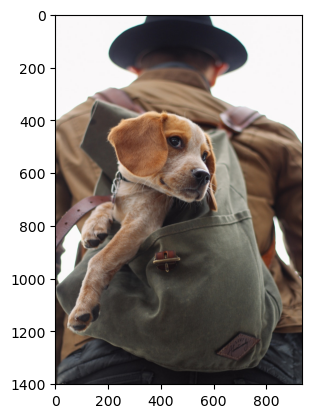

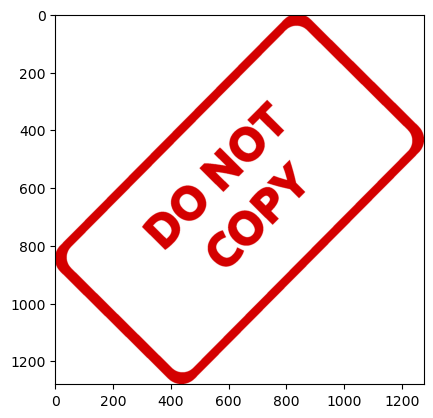

In [10]:
plt.imshow(img1)
plt.show()
plt.imshow(img2)

In [20]:
# img1r = cv2.resize(img1, (1200, 1200))
# plt.imshow(img1r)

# img2r = cv2.resize(img2, (1200, 1200))
# plt.imshow(img2r)

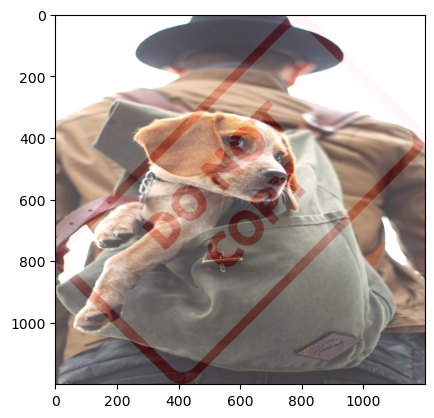

In [21]:
blended = cv2.addWeighted(img1r, alpha=1, src2=img2r, beta = 0.2, gamma=0) # alphaX + betaY + gamma
plt.imshow(blended)

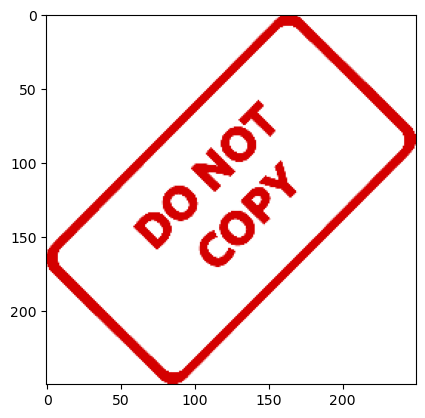

In [24]:
# Overlay a small image on a larger one
img2s = cv2.resize(img2, (250, 250))
plt.imshow(img2s)

1250


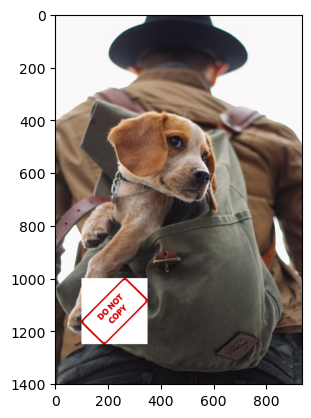

In [27]:
x_offset = 100
y_offset = 1000

x_end = x_offset + img2s.shape[1]
y_end = y_offset + img2s.shape[0]
print(y_end)

largeImg1 = img1.copy()
largeImg1[y_offset: y_end, x_offset: x_end] = img2s
plt.imshow(largeImg1)

1250


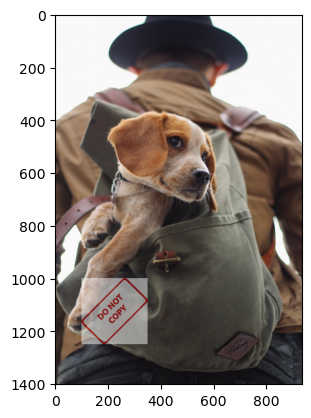

In [28]:
# blend small without mask
x_offset = 100
y_offset = 1000

x_end = x_offset + img2s.shape[1]
y_end = y_offset + img2s.shape[0]
print(y_end)

largeImg1 = img1.copy()
largeImg1[y_offset: y_end, x_offset: x_end] = largeImg1[y_offset: y_end, x_offset: x_end] * 0.5 + img2s * 0.5
plt.imshow(largeImg1)

1250


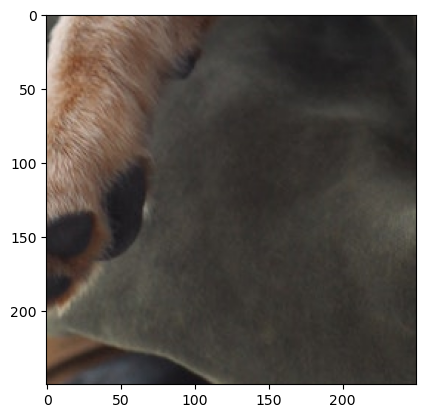

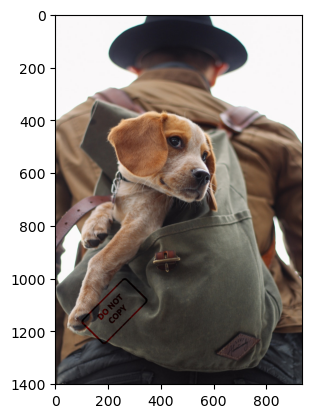

In [34]:
# blend with mask 1 with and operation which works for dark images only.

x_offset = 100
y_offset = 1000

x_end = x_offset + img2s.shape[1]
y_end = y_offset + img2s.shape[0]
print(y_end)

img1s = img1[y_offset: y_end, x_offset: x_end].copy()
plt.imshow(img1s)
plt.show()
blended = cv2.bitwise_and(img1s, img2s) #bitwise and works why? Because white pixels have more 1s, so, they capture non-white pixels. so, reducing a pixel value. It works well if the water mark is dark.
plt.imshow(blended)


largeImg1 = img1.copy()
largeImg1[y_offset: y_end, x_offset: x_end] = blended
plt.imshow(largeImg1)

0 1


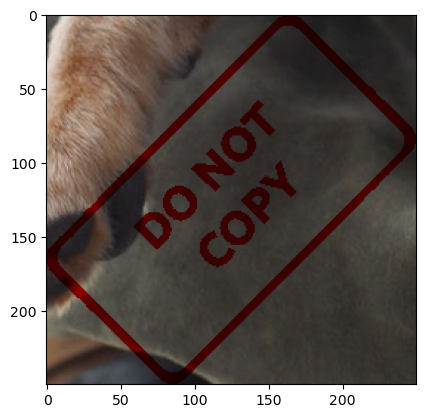

In [75]:
# Masking 2: numpy whitening using np where.
# mask = img2s.copy()
mask = np.where(img2s > 10, 1, 0)
# whitening?
# mask[:, :, 0] = mask[:, :, 1]
# mask[:, :, 2] = mask[:, :, 0]
# mask = img2s / 255
# print(mask)
# plt.imshow(mask)
# plt.show()
print(mask.min(), mask.max())
blended = np.clip(img1s * mask, 0, 255, dtype=np.int16)
# plt.imshow(img1s)
# plt.show()
plt.imshow(blended)


# largeImg1 = img1.copy()
# largeImg1[y_offset: y_end, x_offset: x_end] = blended
# plt.imshow(largeImg1)

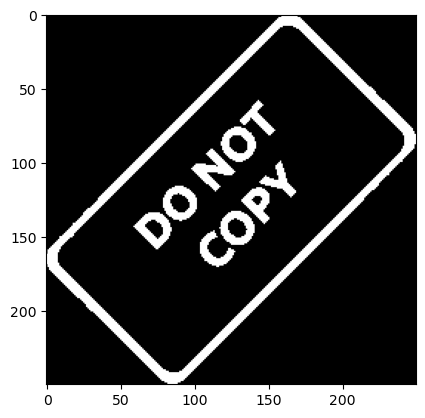

0 255


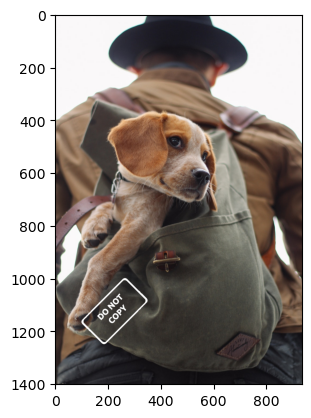

In [74]:
# Masking 3: white mask
# mask = img2s.copy()
mask = np.where(img2s < 10, 255, 0)
# whitening?
mask[:, :, 0] = mask[:, :, 1]
# mask[:, :, 2] = mask[:, :, 0]
# mask = img2s / 255
# print(mask)
plt.imshow(mask)
plt.show()
print(mask.min(), mask.max())
blended = np.clip(img1s + mask, 0, 255, dtype=np.int16)
# plt.imshow(img1s)
# plt.show()
plt.imshow(blended)


largeImg1 = img1.copy()
largeImg1[y_offset: y_end, x_offset: x_end] = blended
plt.imshow(largeImg1)